#### `MAT381E FINAL PROJECT`
# DC vs Marvel - Exploratory Data Analysis and Data Visualization

#### Ezgi Kızılay 090200740 kizilay18

### Introduction

In this project, I tried to analyze very popular DC and Marvel universe's characters, compare them and visualize the results. This universe are an area of interest that fascinates not only the new generation but also the older generation. I used two datasets. One of them is related superpowers of characters. Data format in this set is boolean. If character has current power data is True and otherwise data is False. Some superpowers shown in the table are cold resistance, durability, flight, telepathy,size changing, super speed, death touch, dimensional travel etc. The other one consists of personal information about superheros in Marvel and DC universes. The characteristics of the superheroes in the data set such as gender, race, skin color, alignment, eye color, hair color, and height can be reached. I’ll try to highlight the common & different features of superheroes of each universe.

#### Dataset References

[Dataset-1](https://www.kaggle.com/datasets/claudiodavi/superhero-set?select=heroes_information.csv) : CLAUDIODAVI, 2017. Kaggle, accessed Nov 2022.

[Dataset-2](https://www.kaggle.com/datasets/claudiodavi/superhero-set?select=super_hero_powers.csv) : CLAUDIODAVI, 2017. Kaggle, accessed Nov 2022.

I aim to seek answers to the following questions and more in this project:

- What are the most powerful characters in DC and Marvel Universe 
- Which superheroes more variety of superpowers
- Gender distribution in each universe
- What is the predominant gender in the characters of DC and Marvel 
- What races predominate in the characters of DC and Marvel 
- What superpowers predominate in the characters of DC and Marvel 
- Good & bad alignment in each universe

### Importing Libraries

In [262]:
import pandas as pd
import os
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from collections import Counter,OrderedDict
import math

### Ingesting and Inspecting The Datasets

- I ingested the datasets from kaggle.

In [3]:
os.environ['KAGGLE_USERNAME'] = "ezgikizilay"
os.environ['KAGGLE_KEY'] = "b25675f9aa385d266801da5383362a9b"

from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

api.dataset_download_files('claudiodavi/superhero-set', path='.\\superhero-set',unzip=True)
heroes = pd.read_csv('superhero-set/heroes_information.csv')
heroes_pow = pd.read_csv('superhero-set/super_hero_powers.csv')

#### First dataset, contains 10 columns about features:

In [169]:
heroes.head()

name Gender Eye color               Race Hair color  Height  \
0       A-Bomb   Male    yellow              Human    No Hair   203.0   
1   Abe Sapien   Male      blue      Icthyo Sapien    No Hair   191.0   
2     Abin Sur   Male      blue            Ungaran    No Hair   185.0   
3  Abomination   Male     green  Human / Radiation    No Hair   203.0   
4      Abraxas   Male      blue      Cosmic Entity      Black     NaN   

           Publisher Skin color Alignment  Weight  
0      Marvel Comics        NaN      good   441.0  
1  Dark Horse Comics       blue      good    65.0  
2          DC Comics        red      good    90.0  
3      Marvel Comics        NaN       bad   441.0  
4      Marvel Comics        NaN       bad     NaN

In [236]:
heroes.columns

Index(['Unnamed: 0', 'name', 'Gender', 'Eye color', 'Race', 'Hair color',
       'Height', 'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object')

#### Second dataset, contains 168 columns about features:

In [237]:
heroes_pow.head()

hero_names  Agility  Accelerated Healing  Lantern Power Ring  \
0      3-D Man     True                False               False   
1       A-Bomb    False                 True               False   
2   Abe Sapien     True                 True               False   
3     Abin Sur    False                False                True   
4  Abomination    False                 True               False   

   Dimensional Awareness  Cold Resistance  Durability  Stealth  \
0                  False            False       False    False   
1                  False            False        True    False   
2                  False             True        True    False   
3                  False            False       False    False   
4                  False            False       False    False   

   Energy Absorption  Flight  ...  Web Creation  Reality Warping  Odin Force  \
0              False   False  ...         False            False       False   
1              False   False  ...         False            False       False   
2              False   False  ...         False            False       False   
3              False   False  ...         False            False       False   
4              False   False  ...         False            False       False   

   Symbiote Costume  Speed Force  Phoenix Force  Molecular Dissipation  \
0             False        False          False                  False   
1             False        False          False                  False   
2             False        False          False                  False   
3             False        False          False                  False   
4             False        False          False                  False   

   Vision - Cryo  Omnipresent  Omniscient  
0          False        False       False  
1          False        False       False  
2          False        False       False  
3          False        False       False  
4          False        False       False  

[5 rows x 168 columns]

In [238]:
heroes_pow.columns

Index(['hero_names', 'Agility', 'Accelerated Healing', 'Lantern Power Ring',
       'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth',
       'Energy Absorption', 'Flight',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=168)

### Cleaning, Prepairing and Merging The Datasets

- It looks like there are lots of -99 values in both Weight & Height columns. Since negative values are not possible for these variables and all of them have the same value, that is probably a result of missing values. I’ll turn them into NAs so that the analysis won’t get affected by them.
- The missing values on both datasets represented with “-”, I will also turn them all into NAs.
- I will drop unnecessary columns and rename for merging easily.

In [4]:
heroes.loc[heroes['Weight'] == -99,'Weight'] = np.nan
heroes.loc[heroes['Height'] == -99,'Height'] = np.nan
heroes.loc[heroes['Skin color'] == '-','Skin color'] = np.nan
heroes.loc[heroes['Race'] == '-','Race'] = np.nan
heroes.loc[heroes['Gender'] == '-','Gender'] = np.nan
heroes.loc[heroes['Eye color'] == '-','Eye color'] = np.nan
heroes.loc[heroes['Hair color'] == '-','Skin color'] = np.nan
heroes.loc[heroes['Alignment'] == '-','Alignment'] = np.nan

In [241]:
heroes.columns

Index(['Unnamed: 0', 'name', 'Gender', 'Eye color', 'Race', 'Hair color',
       'Height', 'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object')

In [5]:
heroes.drop(heroes.columns[[0]], axis=1, inplace=True)

In [244]:
heroes

name  Gender Eye color               Race        Hair color  \
0             A-Bomb    Male    yellow              Human           No Hair   
1         Abe Sapien    Male      blue      Icthyo Sapien           No Hair   
2           Abin Sur    Male      blue            Ungaran           No Hair   
3        Abomination    Male     green  Human / Radiation           No Hair   
4            Abraxas    Male      blue      Cosmic Entity             Black   
..               ...     ...       ...                ...               ...   
729  Yellowjacket II  Female      blue              Human  Strawberry Blond   
730             Ymir    Male     white        Frost Giant           No Hair   
731             Yoda    Male     brown     Yoda's species             White   
732          Zatanna  Female      blue              Human             Black   
733             Zoom    Male       red                NaN             Brown   

     Height          Publisher Skin color Alignment  Weight  
0     203.0      Marvel Comics        NaN      good   441.0  
1     191.0  Dark Horse Comics       blue      good    65.0  
2     185.0          DC Comics        red      good    90.0  
3     203.0      Marvel Comics        NaN       bad   441.0  
4       NaN      Marvel Comics        NaN       bad     NaN  
..      ...                ...        ...       ...     ...  
729   165.0      Marvel Comics        NaN      good    52.0  
730   304.8      Marvel Comics      white      good     NaN  
731    66.0       George Lucas      green      good    17.0  
732   170.0          DC Comics        NaN      good    57.0  
733   185.0          DC Comics        NaN       bad    81.0  

[734 rows x 10 columns]

In [6]:
heroes_pow.rename(columns = {'hero_names':'name'}, inplace = True)

- Merging two datasets in two form. I'll use both of them for different purpose.

In [7]:
merged_f = heroes_pow.merge(heroes[['name', 'Gender', 'Publisher', 'Weight', 'Height', 'Race', 'Skin color']], on='name',  how = 'left')
merged_f

name  Agility  Accelerated Healing  Lantern Power Ring  \
0            3-D Man     True                False               False   
1             A-Bomb    False                 True               False   
2         Abe Sapien     True                 True               False   
3           Abin Sur    False                False                True   
4        Abomination    False                 True               False   
..               ...      ...                  ...                 ...   
679  Yellowjacket II    False                False               False   
680             Ymir    False                False               False   
681             Yoda     True                False               False   
682          Zatanna    False                False               False   
683             Zoom    False                False               False   

     Dimensional Awareness  Cold Resistance  Durability  Stealth  \
0                    False            False       False    False   
1                    False            False        True    False   
2                    False             True        True    False   
3                    False            False       False    False   
4                    False            False       False    False   
..                     ...              ...         ...      ...   
679                  False            False       False    False   
680                  False             True        True    False   
681                  False            False       False     True   
682                  False            False       False    False   
683                  False            False       False    False   

     Energy Absorption  Flight  ...  Molecular Dissipation  Vision - Cryo  \
0                False   False  ...                  False          False   
1                False   False  ...                  False          False   
2                False   False  ...                  False          False   
3                False   False  ...                  False          False   
4                False   False  ...                  False          False   
..                 ...     ...  ...                    ...            ...   
679              False    True  ...                  False          False   
680              False   False  ...                  False          False   
681              False   False  ...                  False          False   
682              False   False  ...                  False          False   
683              False   False  ...                  False          False   

     Omnipresent  Omniscient  Gender          Publisher  Weight  Height  \
0          False       False     NaN                NaN     NaN     NaN   
1          False       False    Male      Marvel Comics   441.0   203.0   
2          False       False    Male  Dark Horse Comics    65.0   191.0   
3          False       False    Male          DC Comics    90.0   185.0   
4          False       False    Male      Marvel Comics   441.0   203.0   
..           ...         ...     ...                ...     ...     ...   
679        False       False  Female      Marvel Comics    52.0   165.0   
680        False       False    Male      Marvel Comics     NaN   304.8   
681        False       False    Male       George Lucas    17.0    66.0   
682        False       False  Female          DC Comics    57.0   170.0   
683        False       False    Male          DC Comics    81.0   185.0   

                  Race  Skin color  
0                  NaN         NaN  
1                Human         NaN  
2        Icthyo Sapien        blue  
3              Ungaran         red  
4    Human / Radiation         NaN  
..                 ...         ...  
679              Human         NaN  
680        Frost Giant       white  
681     Yoda's species       green  
682              Human         NaN  
683                NaN         NaN  

[684 rows x 174 columns]

In [8]:
merged_p = heroes_pow.merge(heroes[['name', 'Publisher']], on='name',  how = 'right')
merged_p

name Agility Accelerated Healing Lantern Power Ring  \
0            A-Bomb   False                True              False   
1        Abe Sapien    True                True              False   
2          Abin Sur   False               False               True   
3       Abomination   False                True              False   
4           Abraxas   False               False              False   
..              ...     ...                 ...                ...   
729     White Queen     NaN                 NaN                NaN   
730         Wiz Kid     NaN                 NaN                NaN   
731          Wondra     NaN                 NaN                NaN   
732  Wyatt Wingfoot     NaN                 NaN                NaN   
733     Yellow Claw     NaN                 NaN                NaN   

    Dimensional Awareness Cold Resistance Durability Stealth  \
0                   False           False       True   False   
1                   False            True       True   False   
2                   False           False      False   False   
3                   False           False      False   False   
4                    True           False      False   False   
..                    ...             ...        ...     ...   
729                   NaN             NaN        NaN     NaN   
730                   NaN             NaN        NaN     NaN   
731                   NaN             NaN        NaN     NaN   
732                   NaN             NaN        NaN     NaN   
733                   NaN             NaN        NaN     NaN   

    Energy Absorption Flight  ... Reality Warping Odin Force Symbiote Costume  \
0               False  False  ...           False      False            False   
1               False  False  ...           False      False            False   
2               False  False  ...           False      False            False   
3               False  False  ...           False      False            False   
4               False   True  ...           False      False            False   
..                ...    ...  ...             ...        ...              ...   
729               NaN    NaN  ...             NaN        NaN              NaN   
730               NaN    NaN  ...             NaN        NaN              NaN   
731               NaN    NaN  ...             NaN        NaN              NaN   
732               NaN    NaN  ...             NaN        NaN              NaN   
733               NaN    NaN  ...             NaN        NaN              NaN   

    Speed Force Phoenix Force Molecular Dissipation Vision - Cryo Omnipresent  \
0         False         False                 False         False       False   
1         False         False                 False         False       False   
2         False         False                 False         False       False   
3         False         False                 False         False       False   
4         False         False                 False         False       False   
..          ...           ...                   ...           ...         ...   
729         NaN           NaN                   NaN           NaN         NaN   
730         NaN           NaN                   NaN           NaN         NaN   
731         NaN           NaN                   NaN           NaN         NaN   
732         NaN           NaN                   NaN           NaN         NaN   
733         NaN           NaN                   NaN           NaN         NaN   

    Omniscient          Publisher  
0        False      Marvel Comics  
1        False  Dark Horse Comics  
2        False          DC Comics  
3        False      Marvel Comics  
4        False      Marvel Comics  
..         ...                ...  
729        NaN      Marvel Comics  
730        NaN      Marvel Comics  
731        NaN      Marvel Comics  
732        NaN      Marvel Comics  
733        NaN      Marvel Comics  

[734 rows x 169 columns]

- I filtered merging datasets by Publisher.

In [9]:
DC_f = merged_f.groupby('Publisher', group_keys=False).get_group('DC Comics')
DC_p = merged_p.groupby('Publisher', group_keys=False).get_group('DC Comics')

In [10]:
Marvel_f = merged_f.groupby('Publisher', group_keys=False).get_group('Marvel Comics')
Marvel_p = merged_p.groupby('Publisher', group_keys=False).get_group('Marvel Comics')

In [170]:
DC_f.head()

name  Agility  Accelerated Healing  Lantern Power Ring  \
3       Abin Sur    False                False                True   
8   Adam Strange    False                False               False   
13    Alan Scott    False                False               False   
18         Amazo     True                False                True   
26    Animal Man    False                False               False   

    Dimensional Awareness  Cold Resistance  Durability  Stealth  \
3                   False            False       False    False   
8                   False            False        True     True   
13                  False            False       False    False   
18                  False            False        True    False   
26                  False            False       False    False   

    Energy Absorption  Flight  ...  Molecular Dissipation  Vision - Cryo  \
3               False   False  ...                  False          False   
8               False    True  ...                  False          False   
13              False    True  ...                  False          False   
18              False    True  ...                  False          False   
26              False   False  ...                  False          False   

    Omnipresent  Omniscient  Gender  Publisher  Weight  Height     Race  \
3         False       False    Male  DC Comics    90.0   185.0  Ungaran   
8         False       False    Male  DC Comics    88.0   185.0    Human   
13        False       False    Male  DC Comics    90.0   180.0      NaN   
18        False       False    Male  DC Comics   173.0   257.0  Android   
26        False       False    Male  DC Comics    83.0   183.0    Human   

    Skin color  
3          red  
8          NaN  
13         NaN  
18         NaN  
26         NaN  

[5 rows x 174 columns]

In [171]:
DC_p.head()

name Agility Accelerated Healing Lantern Power Ring  \
2       Abin Sur   False               False               True   
7   Adam Strange   False               False              False   
12    Alan Scott   False               False              False   
17         Amazo    True               False               True   
25    Animal Man   False               False              False   

   Dimensional Awareness Cold Resistance Durability Stealth Energy Absorption  \
2                  False           False      False   False             False   
7                  False           False       True    True             False   
12                 False           False      False   False             False   
17                 False           False       True   False             False   
25                 False           False      False   False             False   

   Flight  ... Reality Warping Odin Force Symbiote Costume Speed Force  \
2   False  ...           False      False            False       False   
7    True  ...           False      False            False       False   
12   True  ...           False      False            False       False   
17   True  ...           False      False            False       False   
25  False  ...           False      False            False       False   

   Phoenix Force Molecular Dissipation Vision - Cryo Omnipresent Omniscient  \
2          False                 False         False       False      False   
7          False                 False         False       False      False   
12         False                 False         False       False      False   
17         False                 False         False       False      False   
25         False                 False         False       False      False   

    Publisher  
2   DC Comics  
7   DC Comics  
12  DC Comics  
17  DC Comics  
25  DC Comics  

[5 rows x 169 columns]

In [172]:
Marvel_f.head()

name  Agility  Accelerated Healing  Lantern Power Ring  \
1         A-Bomb    False                 True               False   
4    Abomination    False                 True               False   
5        Abraxas    False                False               False   
6  Absorbing Man    False                False               False   
9      Agent Bob    False                False               False   

   Dimensional Awareness  Cold Resistance  Durability  Stealth  \
1                  False            False        True    False   
4                  False            False       False    False   
5                   True            False       False    False   
6                  False             True        True    False   
9                  False            False       False     True   

   Energy Absorption  Flight  ...  Molecular Dissipation  Vision - Cryo  \
1              False   False  ...                  False          False   
4              False   False  ...                  False          False   
5              False    True  ...                  False          False   
6               True   False  ...                  False          False   
9              False   False  ...                  False          False   

   Omnipresent  Omniscient  Gender      Publisher  Weight  Height  \
1        False       False    Male  Marvel Comics   441.0   203.0   
4        False       False    Male  Marvel Comics   441.0   203.0   
5        False       False    Male  Marvel Comics     NaN     NaN   
6        False       False    Male  Marvel Comics   122.0   193.0   
9        False       False    Male  Marvel Comics    81.0   178.0   

                Race  Skin color  
1              Human         NaN  
4  Human / Radiation         NaN  
5      Cosmic Entity         NaN  
6              Human         NaN  
9              Human         NaN  

[5 rows x 174 columns]

In [173]:
Marvel_p.head()

name Agility Accelerated Healing Lantern Power Ring  \
0         A-Bomb   False                True              False   
3    Abomination   False                True              False   
4        Abraxas   False               False              False   
5  Absorbing Man   False               False              False   
8      Agent Bob   False               False              False   

  Dimensional Awareness Cold Resistance Durability Stealth Energy Absorption  \
0                 False           False       True   False             False   
3                 False           False      False   False             False   
4                  True           False      False   False             False   
5                 False            True       True   False              True   
8                 False           False      False    True             False   

  Flight  ... Reality Warping Odin Force Symbiote Costume Speed Force  \
0  False  ...           False      False            False       False   
3  False  ...           False      False            False       False   
4   True  ...           False      False            False       False   
5  False  ...           False      False            False       False   
8  False  ...           False      False            False       False   

  Phoenix Force Molecular Dissipation Vision - Cryo Omnipresent Omniscient  \
0         False                 False         False       False      False   
3         False                 False         False       False      False   
4         False                 False         False       False      False   
5         False                 False         False       False      False   
8         False                 False         False       False      False   

       Publisher  
0  Marvel Comics  
3  Marvel Comics  
4  Marvel Comics  
5  Marvel Comics  
8  Marvel Comics  

[5 rows x 169 columns]

### Analysis and Visualizations 

### What are the most powerful characters in DC and Marvel Universe?

- I wrote a function called 'pow_c' to calculate the powers of the heroes. Since there is no columns showing the total power of the heroes in the datasets, I decided to calculate this by counting features that hero has. In Datset-2, the data format is boolean, so if the hero has current power, the value is `True`. When the pow_c() function takes the 'heroes_pow' dataset as an argument, it counts features which are `True`. Thanks to this, I can see which hero has more power and is most powerful.

In [11]:
def pow_c(arg):
    df = []
    for j in arg.index:
        count = 0
        for i in arg.columns:
            if arg.loc[[j],i].item() == True:
                count = count + 1
        df.append(count)
        #print(f"{arg.loc[j][0]} {count}")
    df = pd.Series(df)
    return df

In [12]:
df = pow_c(heroes_pow)

C:\Users\ezgik\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `item` has been deprecated and will be removed in a future version
  


In [13]:
dt = heroes_pow['name']

In [175]:
data=pd.concat([dt,df],axis=1)
data.rename(columns = { 0 :'powerful'}, inplace = True)

In [176]:
data

name  powerful
0            3-D Man         4
1             A-Bomb         7
2         Abe Sapien        16
3           Abin Sur         1
4        Abomination         8
..               ...       ...
662  Yellowjacket II         3
663             Ymir         6
664             Yoda        19
665          Zatanna         8
666             Zoom         4

[667 rows x 2 columns]

- The first 25 characters were sorted and selected:

In [177]:
data = data.sort_values(by="powerful", ascending=False)
data = data.head(25)
data = data.reset_index(drop = True)
data

name  powerful
0             Spectre        49
1               Amazo        44
2   Martian Manhunter        35
3     Living Tribunal        35
4     Man of Miracles        34
5      Captain Marvel        33
6                 T-X        33
7            Galactus        32
8              T-1000        32
9       One-Above-All        31
10    Mister Mxyzptlk        31
11             Thanos        31
12               Odin        31
13       Wonder Woman        30
14              Cable        30
15  Franklin Richards        29
16           Superman        29
17       Dr Manhattan        29
18           Darkseid        28
19       Captain Atom        27
20          Supergirl        27
21        Alex Mercer        27
22             Legion        26
23          Venompool        26
24        Darth Vader        26

#### Visualizations

#### "Spectre" is the most powerful character!! and has also most various superpowers! 
#### "Amazo" and "Martian Manhunter" follow it.

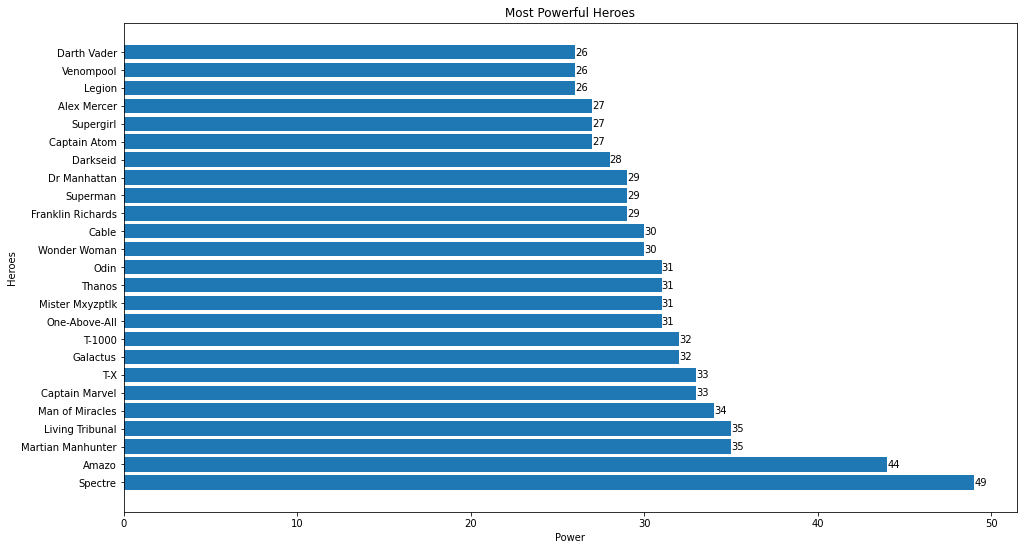

In [269]:
fig, ax = plt.subplots(figsize = (16,9))
for i in range(len(data['name'])):
        plt.text(data['powerful'][i],i,data['powerful'][i], va = 'center')
plt.barh(data['name'],data['powerful'])
plt.xlabel('Power')
plt.ylabel('Heroes')
plt.title('Most Powerful Heroes')

plt.show()

####  25 most powerful characters shown by a different graphic:

In [62]:
fig = px.treemap(data, path=[px.Constant('Name'), 'name'],
                 values=data['powerful'],
                 color=data['powerful'],
                 color_continuous_scale='Spectral_r',
                 color_continuous_midpoint=np.average(data['powerful'])
                )
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

### Gender distribution in each universe, What is the predominant gender in the characters of DC and Marvel ?

In [180]:
dcg = DC_f[['name','Gender']].groupby('Gender', group_keys=False).count()

In [179]:
mg = Marvel_f[['name','Gender']].groupby('Gender', group_keys=False).count()

#### Visualizations

#### DC universe has 72.3% male and 27.7% female percentage. Marvel universe has 69.6% male and 30.4% female ratio. 
#### As can be seen, the male gender is dominates in both universes.

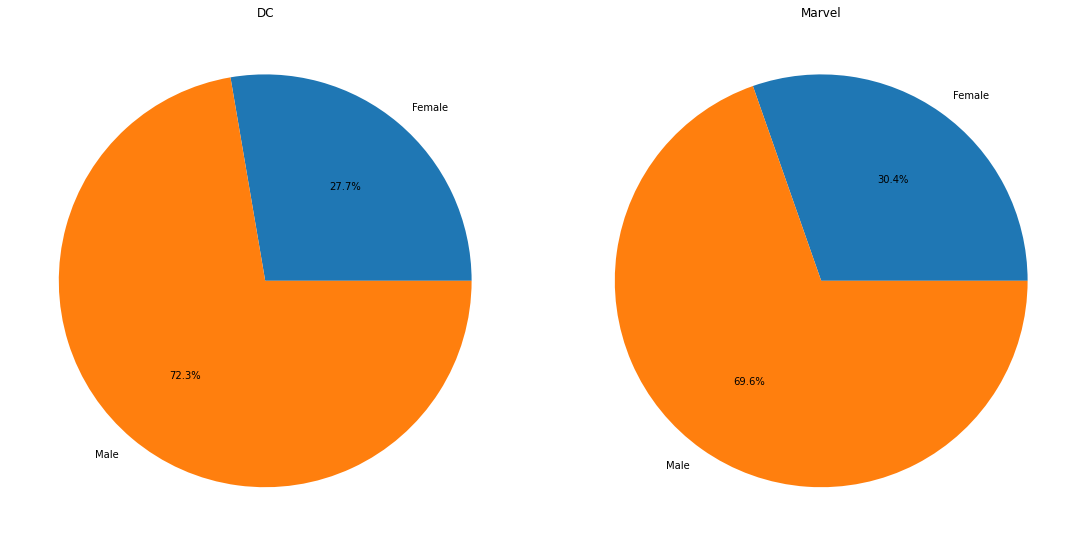

In [182]:
fig = plt.subplots(figsize = (16,9)) 
plt.subplot(1, 2, 1)
labels = a.index
values = a['name']
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('DC')

plt.subplot(1, 2, 2)
labels = mg.index
values = mg['name']
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Marvel')

plt.tight_layout(4)
 

plt.show()

### What races predominate in the characters of DC and Marvel


In [240]:
dc_race = Counter(DC_f['Race'].dropna())

In [241]:
dc_race

Counter({'Ungaran': 1,
         'Human': 86,
         'Android': 4,
         'God / Eternal': 7,
         'Atlantean': 4,
         'New God': 3,
         'Bizarro': 1,
         'Metahuman': 2,
         'Human / Radiation': 1,
         'Cyborg': 2,
         'Amazon': 2,
         'Alien': 2,
         'Human / Cosmic': 1,
         'Demon': 1,
         'Kryptonian': 7,
         'Mutant': 2,
         'Gorilla': 1,
         'Human-Vuldarian': 1,
         'Bolovaxian': 1,
         'Animal': 1,
         'Czarnian': 1,
         'Martian': 1,
         'Parademon': 1,
         'Talokite': 1,
         'Korugaran': 1,
         'Zombie': 1,
         'Tamaranean': 1,
         'Demi-God': 1})

In [237]:
marvel_race = Counter(Marvel_f['Race'].dropna())

In [238]:
marvel_race

Counter({'Human': 79,
         'Human / Radiation': 10,
         'Cosmic Entity': 4,
         'Cyborg': 4,
         'Mutant': 55,
         'Symbiote': 8,
         'Alien': 5,
         'Neyaphem': 1,
         'God / Eternal': 4,
         'Inhuman': 4,
         'Demon': 3,
         'Vampire': 1,
         'Human-Kree': 2,
         'Human / Altered': 2,
         'Kakarantharaian': 1,
         'Zen-Whoberian': 1,
         'Strontian': 1,
         'Flora Colossus': 1,
         'Asgardian': 5,
         'Demi-God': 1,
         'Eternal': 2,
         'Spartoi': 1,
         'Atlantean': 1,
         'Luphomoid': 1,
         'Human / Cosmic': 1,
         'Animal': 1,
         'Clone': 1,
         'Human-Spartoi': 1,
         'Android': 2,
         'Frost Giant': 2,
         'Mutant / Clone': 1})

#### Visualizations

#### DC universe has 62.3% human percentage. Marvel universe has 38.3% human ratio. 
#### As can be seen, the human race is dominates in both universes. I think this is really engrossing!

In [224]:
def plt_func(arg):
    fig = plt.subplots(figsize = (17,50)) 
    labels = arg.keys()
    values = arg.values()
    plt.pie(values, labels=labels, autopct='%1.1f%%')
    plt.show()

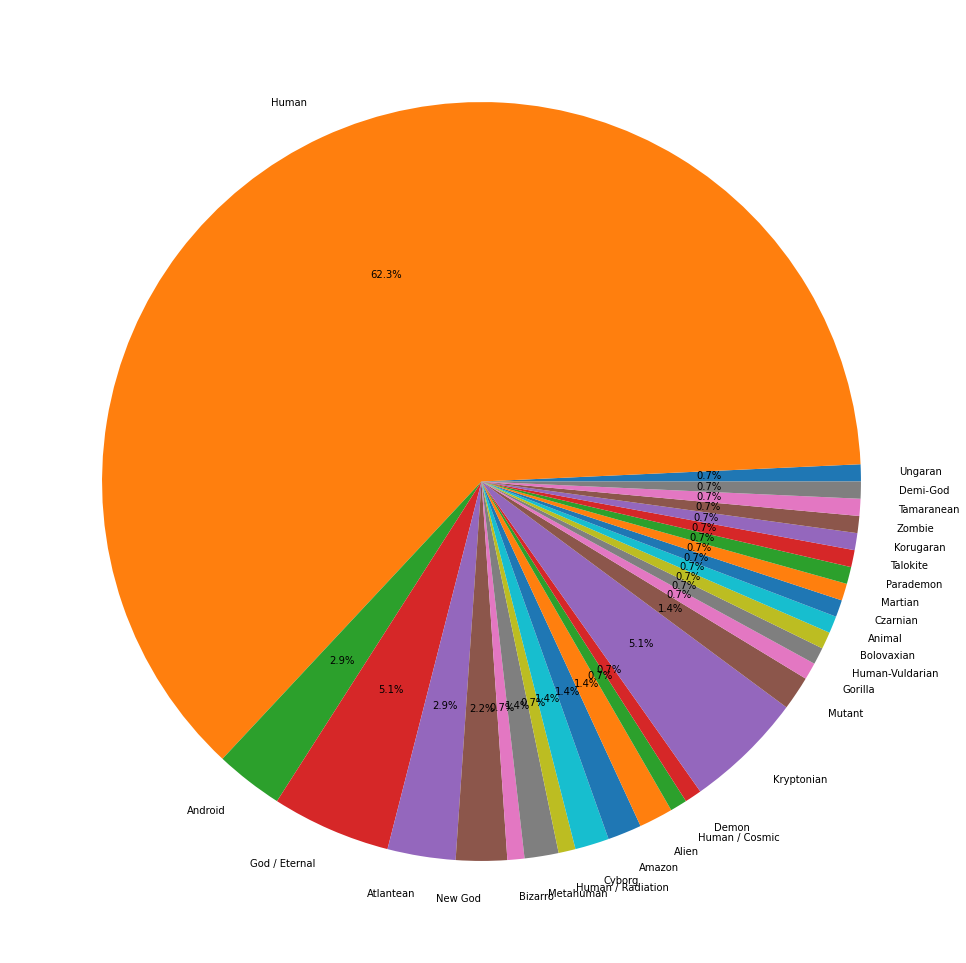

In [242]:
plt_func(dc_race)

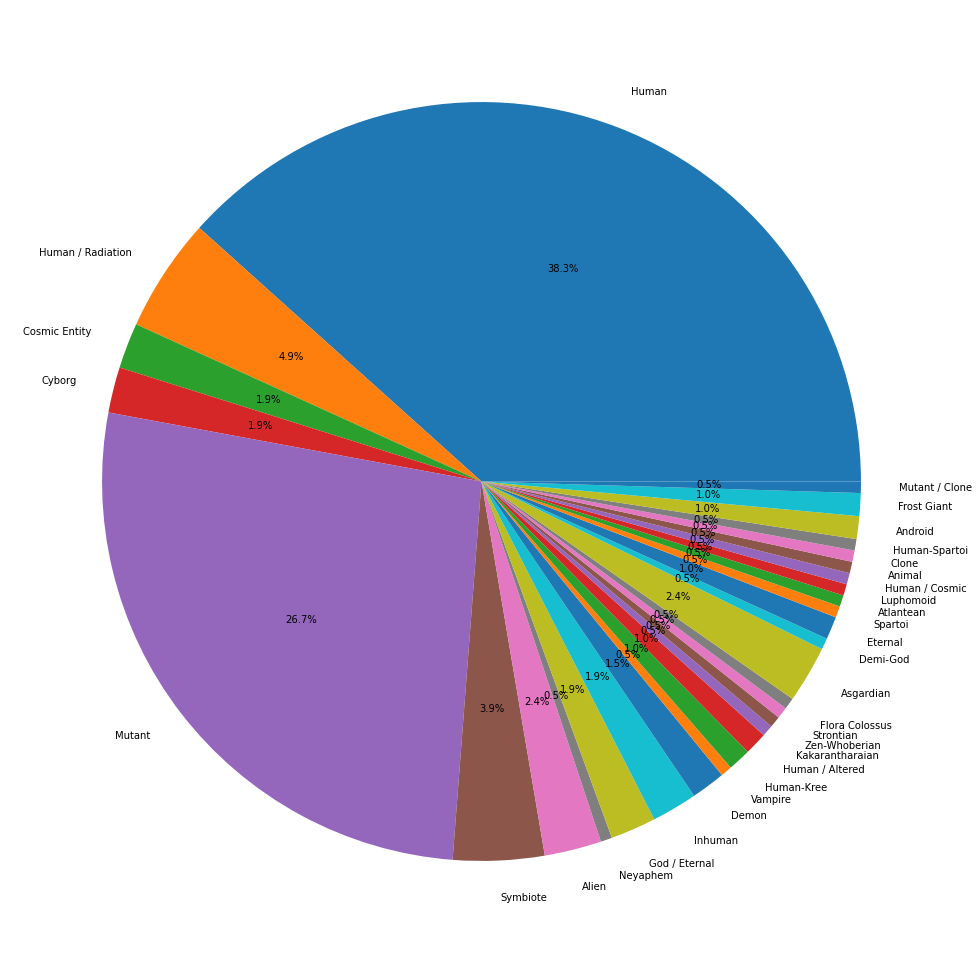

In [239]:
plt_func(marvel_race)

### What superpowers predominate in the characters of DC and Marvel? 

- Similar to the pow_c() function, the sp() function calculates commons of the superpowers.

In [244]:
def sp(arg):
    dF =[]
    for j in arg.columns:
        count = 0
        for i in arg.index:
            if arg.loc[[i],j].item() == True:
                count = count + 1
        dF.append(count)
        #print(f"{arg.loc[0, [j]]} {count}")
    return dF

In [245]:
dF = pd.Series(sp(heroes_pow))

C:\Users\ezgik\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning:

`item` has been deprecated and will be removed in a future version



In [246]:
heroes_pow.drop(heroes_pow.columns[[0]], axis=1, inplace=True)
dT = heroes_pow.columns
dT = pd.Series(dT)

In [257]:
Data = pd.concat([dT,dF],axis=1)
Data.rename(columns = { 0 :'power', 1 : 'commons'}, inplace = True)

In [258]:
Data = Data.dropna()

In [259]:
Data = Data.sort_values(by="commons", ascending=False)

In [260]:
Data = Data.head(25)
Data = Data.reset_index(drop = True)

In [261]:
Data

power  commons
0            Cryokinesis      360
1          Astral Travel      289
2                Stealth      257
3             Possession      249
4    Accelerated Healing      242
5           Danger Sense      212
6     Lantern Power Ring      178
7        Invulnerability      164
8         Super Strength      158
9            Duplication      147
10     Energy Absorption      126
11        Weapons Master      119
12     Energy Constructs      117
13          Intelligence      113
14    Power Augmentation      105
15          Energy Armor       92
16           Telekinesis       89
17       Self-Sustenance       86
18                Flight       77
19       Enhanced Senses       72
20            Nova Force       72
21            Camouflage       69
22  Peak Human Condition       66
23          Clairvoyance       65
24          Energy Beams       61

#### Visualizations

#### As can be seen, 'Cryokinesis' is most common superpower! Cryokinesis is that psychic ability to control and create ice and cold temperatures. 
#### 360 heroes from Marvel and DC universes have it! 'Astral Travel' and 'Stealth' follow it.

C:\Users\ezgik\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



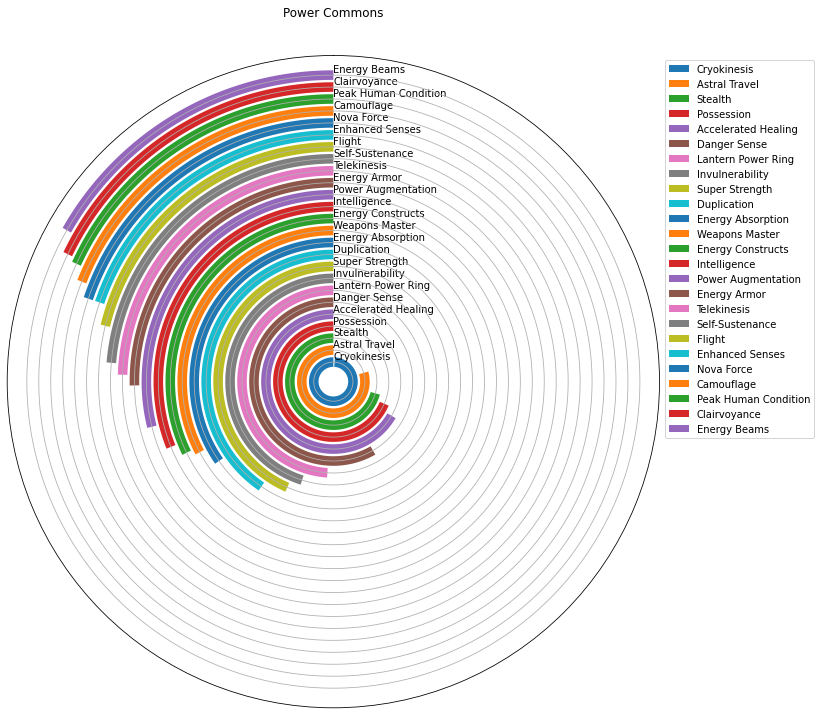

In [264]:
plt.gcf().set_size_inches(12, 12)
max_val = max(Data['commons'])*1.01
ax = plt.subplot(projection='polar')

ax.set_theta_zero_location('N')
ax.set_theta_direction(1)
ax.set_rlabel_position(0)
ax.set_thetagrids([], labels=[])
ax.set_rgrids(range(len(Data)), labels= Data['power'])

ax = plt.subplot(projection='polar')
plt.title('Power Commons')

for i in range(len(Data)):
    ax.barh(i, list(Data['commons'])[i]*2*np.pi/max_val,
            label=list(Data['power'])[i])

plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [268]:
fig = px.bar(Data, x='power', y='commons', text='commons',color = Data['power'])

fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout({'plot_bgcolor': 'white',
                   'paper_bgcolor': 'white'})

fig.update_layout(width=1200, height=500,
                  margin = dict(t=15, l=15, r=15, b=15))
fig.show()

### Good & bad alignment in each universe

In [274]:
DC_alg = Counter(heroes.groupby('Publisher').get_group('DC Comics')['Alignment'].dropna())
DC_alg

Counter({'good': 142, 'bad': 59, 'neutral': 13})

In [275]:
Marvel_alg = Counter(heroes.groupby('Publisher').get_group('Marvel Comics')['Alignment'].dropna())
Marvel_alg

Counter({'good': 259, 'bad': 115, 'neutral': 11})

#### Visualizaitons

#### Luckily, the good alignment is dominates in both universes! Otherwise, the situations could have been more complicated! :)

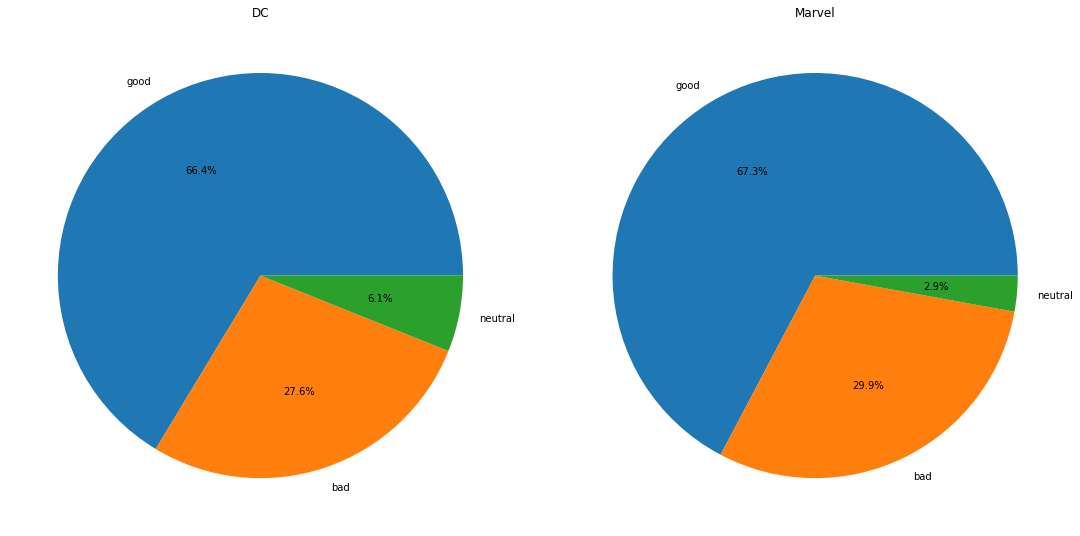

In [235]:
fig = plt.subplots(figsize = (16,9)) 
plt.subplot(1, 2, 1)
labels = DC_alg.keys()
values = DC_alg.values()
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('DC')

plt.subplot(1, 2, 2)
labels = Marvel_alg.keys()
values = Marvel_alg.values()
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Marvel')

plt.tight_layout(4)
 

plt.show()

### Conclusion and Inferences

In this project, I anaylzed Marvel and DC universes' characters and compared them. I tried to determine who is the most powerful, which alignment or gender dominates universes, which superpower is most common etc.

Selecting a dataset considering certain features, making it suitable for working on, analyzing and visualizing its data are the experiences I gained in this project.

Thank you.